In [1]:
import pandas as pd

# Load the dataset

data = pd.read_csv('D:\mohamed\mobadra_project\superstore\superstore.csv')

# Display the first few rows to understand the structure of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

(          Category         City        Country Customer.ID     Customer.Name  \
 0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
 1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
 2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
 3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
 4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   
 
    Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
 0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
 1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
 2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
 3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
 4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   
 
     Segment                Sh

<ipython-input-58-aa26be019a38>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Order_Month', y='Sales', data=data_cleaned, ci=None)


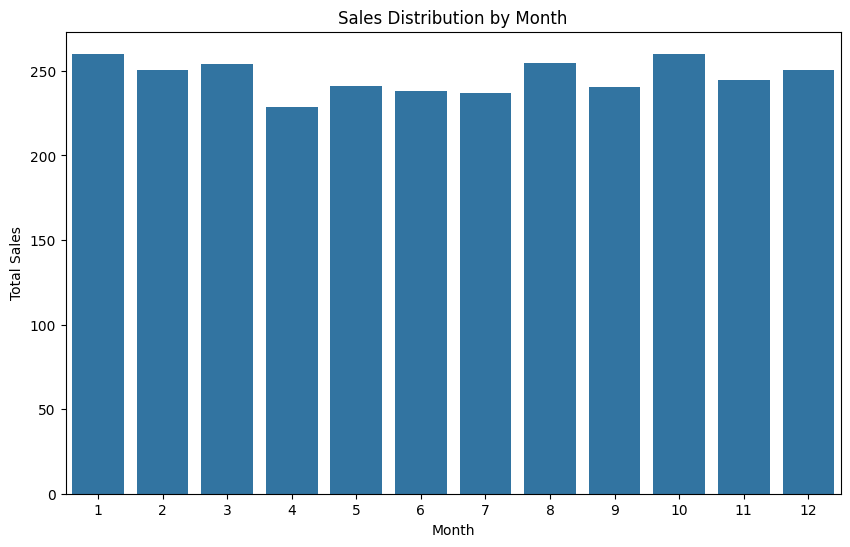

In [ ]:
# Step 1: Sales distribution by month (before applying the model)
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Month', y='Sales', data=data_cleaned, ci=None)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()







In [2]:
# Convert date columns to datetime format
data['Order.Date'] = pd.to_datetime(data['Order.Date'])
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'])

# Feature engineering: extract year, month, and day of the week from Order.Date
data['Order_Year'] = data['Order.Date'].dt.year
data['Order_Month'] = data['Order.Date'].dt.month
data['Order_DayOfWeek'] = data['Order.Date'].dt.dayofweek

# Drop unnecessary columns (such as Customer ID, Order ID, and Product details)
data_cleaned = data.drop(columns=['Customer.ID', 'Customer.Name', 'Order.ID', 'Product.ID', 'Product.Name',
                                  'Row.ID', 'Ship.Date', 'Order.Date', 'State', 'City', 'Country', 'Sub.Category'])

# Display the cleaned data with relevant columns
data_cleaned.head()


,Category,Discount,Market,记录数,Order.Priority,Profit,Quantity,Region,Sales,Segment,Ship.Mode,Shipping.Cost,Year,Market2,weeknum,Order_Year,Order_Month,Order_DayOfWeek
0,Office Supplies,0.0,US,1,High,9.3312,3,West,19,Consumer,Second Class,4.37,2011,North America,2,2011,1,4
1,Office Supplies,0.0,US,1,Medium,9.2928,2,West,19,Consumer,Standard Class,0.94,2011,North America,4,2011,1,4
2,Office Supplies,0.0,US,1,Medium,9.8418,3,West,21,Consumer,Standard Class,1.81,2011,North America,32,2011,8,4
3,Office Supplies,0.0,US,1,Medium,53.2608,2,West,111,Consumer,Standard Class,4.59,2011,North America,32,2011,8,4
4,Office Supplies,0.0,US,1,High,3.1104,1,West,6,Consumer,Standard Class,1.32,2011,North America,40,2011,9,3


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Category', 'Market', 'Order.Priority', 'Region', 'Segment', 'Ship.Mode', 'Market2']:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
# Define features (X) and target (y)
X = data_cleaned.drop(columns=['Sales'])
y = data_cleaned['Sales']
X


,Category,Discount,Market,记录数,Order.Priority,Profit,Quantity,Region,Segment,Ship.Mode,Shipping.Cost,Year,Market2,weeknum,Order_Year,Order_Month,Order_DayOfWeek
0,1,0.0,6,1,1,9.3312,3,12,0,2,4.37,2011,5,2,2011,1,4
1,1,0.0,6,1,3,9.2928,2,12,0,3,0.94,2011,5,4,2011,1,4
2,1,0.0,6,1,3,9.8418,3,12,0,3,1.81,2011,5,32,2011,8,4
3,1,0.0,6,1,3,53.2608,2,12,0,3,4.59,2011,5,32,2011,8,4
4,1,0.0,6,1,1,3.1104,1,12,0,3,1.32,2011,5,40,2011,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,1,0.2,6,1,1,22.5732,2,12,1,1,5.15,2014,5,49,2014,12,2
51286,1,0.2,6,1,1,3.1584,6,12,1,1,0.44,2014,5,49,2014,12,2
51287,1,0.2,6,1,3,4.2804,2,12,2,0,0.31,2014,5,51,2014,12,3
51288,1,0.2,6,1,0,33.9300,3,12,2,0,15.95,2014,5,52,2014,12,3


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
r2

0.7174348326015567

In [5]:
import mlflow

In [6]:
mlflow.set_experiment("Sales Prediction")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

with mlflow.start_run(run_name=f"RandomForestRegressor Each order"):
    mlflow.log_metrics({
        'r2_score':r2 ,
    })

    mlflow.sklearn.log_model(model, 'RandomForestRegressor') 

2024/10/23 04:19:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/23 04:19:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForestRegressor Each order at: http://127.0.0.1:5000/#/experiments/943977692852499888/runs/bf800dd157404dd690e0c3dfbcc40268.
2024/10/23 04:19:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/943977692852499888.


In [ ]:
# Grouping the test data by Category to analyze predictions for each category
X_test_with_category = X_test.copy()
X_test_with_category['Sales_Actual'] = y_test
X_test_with_category['Sales_Predicted'] = y_pred

# Group by Category and calculate average actual and predicted sales
sales_by_category = X_test_with_category.groupby('Category')[['Sales_Actual', 'Sales_Predicted']].mean()

# Display sales predictions by category
sales_by_category


,Sales_Actual,Sales_Predicted
Category,,
0,423.866530,426.449656
1,117.145115,121.367945
2,479.680352,474.044912


In [7]:
# Grouping sales by month
sales_by_month = data_cleaned.groupby('Order_Month')['Sales'].sum()

# Display sales by month
print(sales_by_month)


Order_Month
1      675141
2      543768
3      770519
4      698603
5      904061
6     1269751
7      749423
8     1293852
9     1437432
10    1168220
11    1551319
12    1580816
Name: Sales, dtype: int64


In [8]:
# Step 1: Group sales by month and create the new feature
monthly_sales = data_cleaned.groupby('Order_Month')['Sales'].sum().reset_index()
monthly_sales.rename(columns={'Sales': 'Total_Monthly_Sales'}, inplace=True)

# Merge the monthly sales back into the original dataset
data_with_monthly_sales = pd.merge(data_cleaned, monthly_sales, on='Order_Month', how='left')

# Step 2: Define features (X) and target (y), including the new feature
X_new = data_with_monthly_sales.drop(columns=['Sales'])
y_new = data_with_monthly_sales['Sales']

# Step 3: Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Step 4: Train the model using the new feature
model_new = RandomForestRegressor(n_estimators=100, random_state=42)
model_new.fit(X_train_new, y_train_new)

# Step 5: Make predictions and evaluate the new model
y_pred_new = model_new.predict(X_test_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

# Display the new evaluation metrics
mse_new, r2_new


(76876.43641133749, 0.7182187273031369)

In [9]:
y_pred_new

array([ 49.15, 116.94,  21.85, ...,  10.14, 344.07,  17.12])

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {
        'Mean Squared Error': mse,
        'R-squared': r2,
        'Model':model
    }



In [13]:
# Step 5: Display the results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-squared: {metrics['R-squared']}")


    mlflow.set_experiment("Sales Prediction")
    mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")
    
    with mlflow.start_run(run_name=f"{model_name} Total Sales"):
        mlflow.log_metrics({
            'r2_score':metrics['R-squared'] ,
        })
        if model_name =='XGBoost Regressor':
            mlflow.xgboost.log_model(metrics['Model'] , model_name) 
        else:
            mlflow.sklearn.log_model(metrics['Model'] , model_name) 


Model: Linear Regression
Mean Squared Error: 129741.3657375353
R-squared: 0.5244487275224383


2024/10/23 04:26:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/23 04:26:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Linear Regression Total Sales at: http://127.0.0.1:5000/#/experiments/943977692852499888/runs/d18bf2f52feb496db7d1603bdb135d19.
2024/10/23 04:26:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/943977692852499888.



Model: Random Forest Regressor
Mean Squared Error: 77090.30098296939
R-squared: 0.7174348326015567


2024/10/23 04:26:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/23 04:26:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Regressor Total Sales at: http://127.0.0.1:5000/#/experiments/943977692852499888/runs/f6dcd0fb76254090a9ab3d2b3a1cd987.
2024/10/23 04:26:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/943977692852499888.



Model: Gradient Boosting Regressor
Mean Squared Error: 73007.26584492803
R-squared: 0.7324007036977049


2024/10/23 04:26:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/23 04:26:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Gradient Boosting Regressor Total Sales at: http://127.0.0.1:5000/#/experiments/943977692852499888/runs/4e7bc773db7c4e498c0afc802614de97.
2024/10/23 04:26:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/943977692852499888.
C:\Users\hossa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



Model: XGBoost Regressor
Mean Squared Error: 80716.52329238366
R-squared: 0.7041433536370372


2024/10/23 04:26:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/23 04:26:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost Regressor Total Sales at: http://127.0.0.1:5000/#/experiments/943977692852499888/runs/d28c3620e37c474eb8d485d720f701e4.
2024/10/23 04:26:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/943977692852499888.


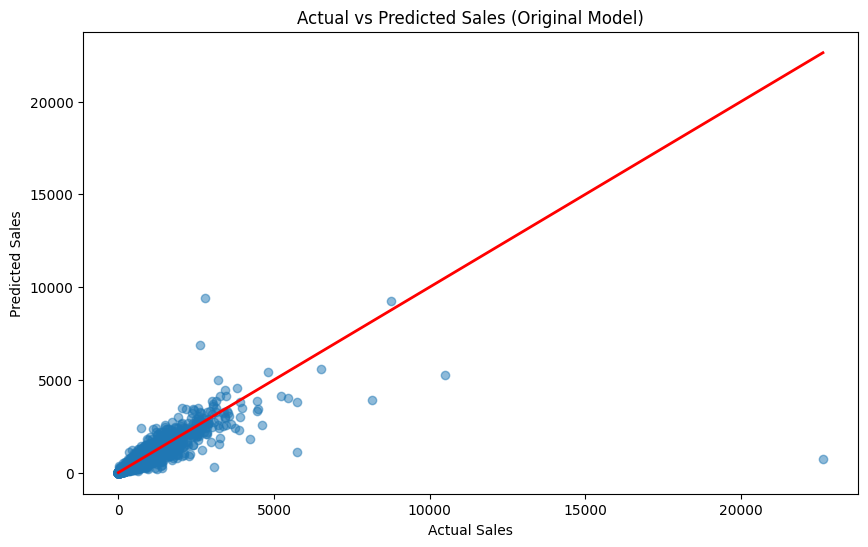

In [ ]:
# Step 2: Actual vs Predicted Sales (for the original model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Identity line
plt.title('Actual vs Predicted Sales (Original Model)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

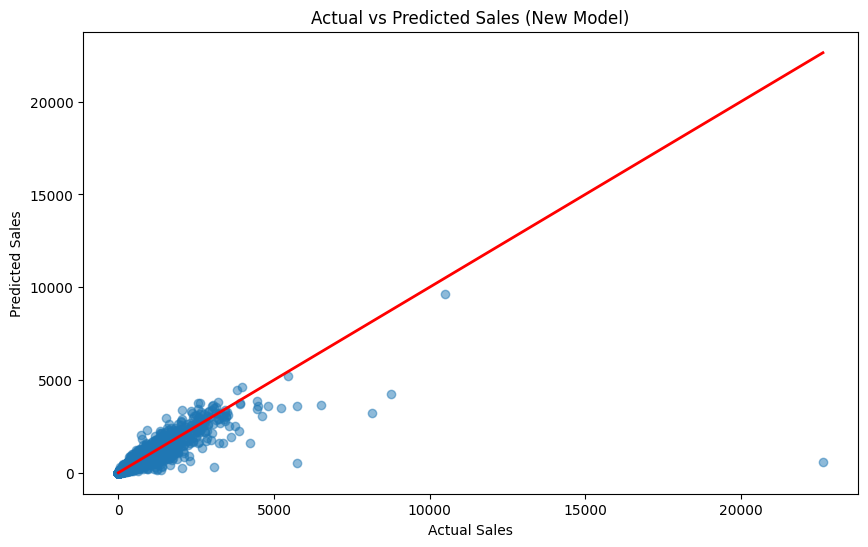

In [ ]:
# Step 3: Actual vs Predicted Sales (for the new model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_pred_new, alpha=0.5)
plt.plot([min(y_test_new), max(y_test_new)], [min(y_test_new), max(y_test_new)], color='red', lw=2)  # Identity line
plt.title('Actual vs Predicted Sales (New Model)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


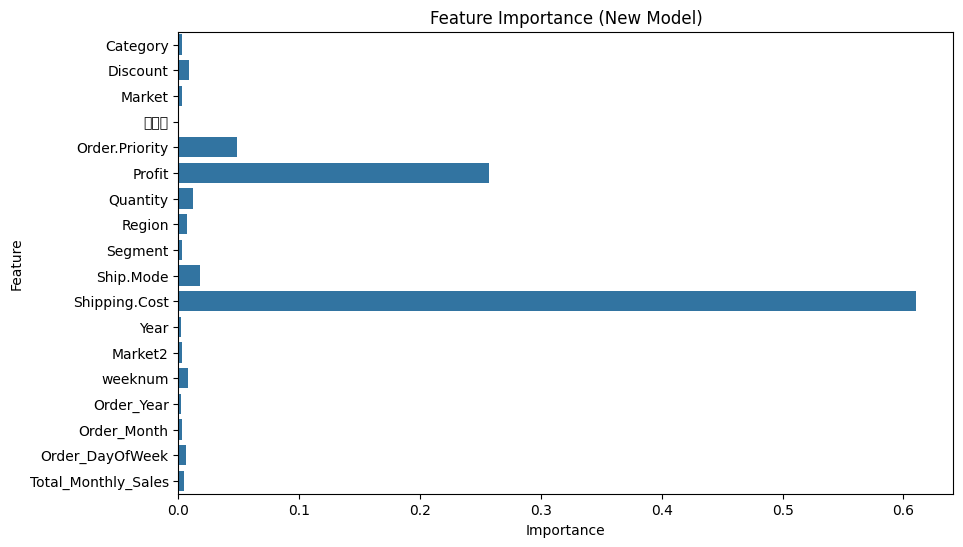

In [ ]:
# Step 4: Feature importance (for the new model)
importances_new = model_new.feature_importances_
features_new = X_new.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_new, y=features_new)
plt.title('Feature Importance (New Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<ipython-input-56-d607d3f39872>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Order_Month', y='Predicted_Sales', data=plot_df, ci=None)  # Use plot_df here


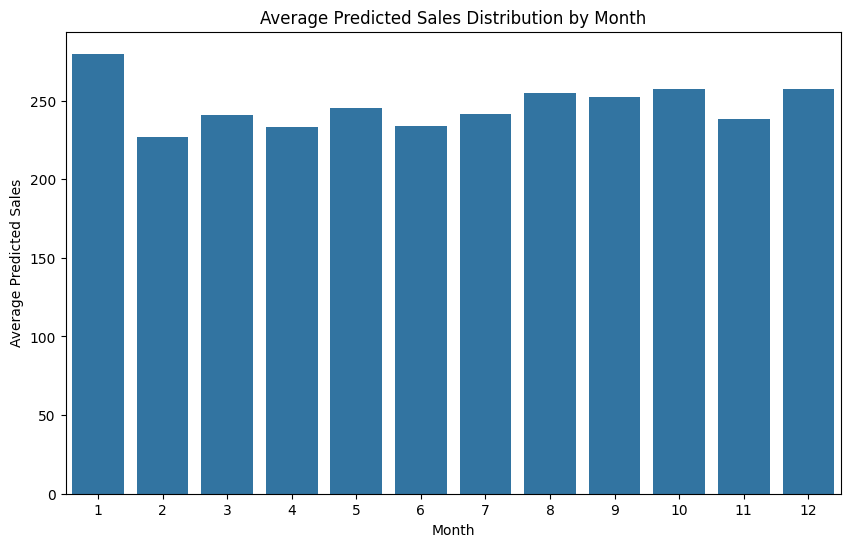

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas for DataFrame manipulation

# Assuming y_pred and data_cleaned are defined from your previous steps
# ...

# Create a new DataFrame for the bar plot, but only using the relevant subset of data_cleaned
# that corresponds to the y_pred values (likely your test set)
plot_df = pd.DataFrame({'Order_Month': data_cleaned['Order_Month'].iloc[:len(y_pred)], 'Predicted_Sales': y_pred})

# Group by 'Order_Month' and calculate the average predicted sales for each month
plot_df = plot_df.groupby('Order_Month')['Predicted_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Month', y='Predicted_Sales', data=plot_df, ci=None)  # Use plot_df here
plt.title('Average Predicted Sales Distribution by Month')  # Updated title for clarity
plt.xlabel('Month')
plt.ylabel('Average Predicted Sales')  # Updated y-axis label
plt.show()